<center> <h1> <b><span style="color:red"> 
BDM500 Project Source Code <br><br>
Jeff Sit<br><br>
<center> 12/7/2022</span></b></h1>

In [1]:
#1.  Problem: need to predict a pro Overwatch player's Role based on other attributes
#2a. Examine data: Use pandas + read.csv to load data and create dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = 'data/cleaned_ow_dataset.csv'
df = pd.read_csv(path)
df.drop(df.columns[10:16], axis=1, inplace=True)
df.head(10)

,Player,Role,Hero,MouseModel,MouseWeight,MouseWeightToSizeRatio,DPI,Sensitivity,eDPI,cmPer360
0,ameng,Tank,Orisa,Logitech G Pro Wireless,80,1.08,800,6.00,4800,28.88
1,Guxue,Tank,Winston,Logitech G903,111,1.26,1600,9.99,15984,8.67
2,Poko,Tank,D.Va,Logitech G703,95,1.28,800,12.50,10000,13.86
3,HOTBA,Tank,D.Va,Logitech G900,107,1.50,800,12.01,9608,14.43
4,Smurf,Tank,Winston,Logitech G Pro X Superlight,60,0.81,800,6.00,4800,28.88
5,Pine,Damage,McCree,SteelSeries Rival 100,120,1.48,500,15.00,7500,18.48
6,SLIME,Support,Lucio,Logitech G903,111,1.26,1000,7.20,7200,19.25
7,tobi,Support,Lucio,Logitech G Pro Wireless,80,1.08,800,8.50,6800,20.38
8,Profit,Damage,Tracer,Logitech G Pro Wireless,80,1.08,800,8.25,6600,21.00
9,Closer,Support,Mercy,Logitech G903,111,1.26,800,8.00,6400,21.66


In [2]:
#2b. Check data: Clean, filter, and edit data where necessary
# Use .shape, .info(), and .describe() to extract as much information
# about the dataframe columns
df.shape

(148, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Player                  148 non-null    object 
 1   Role                    148 non-null    object 
 2   Hero                    148 non-null    object 
 3   MouseModel              148 non-null    object 
 4   MouseWeight             148 non-null    int64  
 5   MouseWeightToSizeRatio  148 non-null    float64
 6   DPI                     148 non-null    int64  
 7   Sensitivity             148 non-null    float64
 8   eDPI                    148 non-null    int64  
 9   cmPer360                148 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 11.7+ KB


In [4]:
df.describe()

,MouseWeight,MouseWeightToSizeRatio,DPI,Sensitivity,eDPI,cmPer360
count,148.000000,148.000000,148.000000,148.00000,148.000000,148.000000
mean,83.655405,1.136486,950.337838,5.47473,4856.317568,32.746419
std,14.815745,0.177484,301.046735,2.47606,2043.246796,11.968048
min,50.000000,0.810000,400.000000,1.50000,1776.000000,8.670000
25%,80.000000,1.080000,800.000000,3.96000,3520.000000,24.750000
50%,80.000000,1.080000,800.000000,5.00000,4400.000000,31.500000
75%,89.250000,1.265000,1000.000000,6.50000,5600.000000,39.380000
max,120.000000,1.500000,1650.000000,15.00000,15984.000000,78.040000


In [5]:
# Use .value_counts() to get the number of rows per role
df['Role'].value_counts()

Damage     64
Tank       42
Support    42
Name: Role, dtype: int64

In [6]:
# Checking and correcting the names in the MouseModel categorical variable
# Finalmouse has 2 spellings, where the lowercase m is correct
# Due to this issue, they are being counted separately
df['MouseModel'].value_counts()

Logitech G Pro Wireless          45
Logitech G Pro X Superlight      17
Logitech G Pro                   17
Logitech G903                    15
Logitech G403                     7
Logitech G703                     6
Zowie EC2-B                       5
Logitech G305                     3
Logitech G304                     3
Razer Viper Ultimate              3
Logitech G900                     2
FinalMouse Ultralight 2           2
Glorious Model O                  2
Logitech G502                     2
Zowie EC1-B                       2
SteelSeries Rival 100             1
SteelSeries Kinzu V3              1
Finalmouse Ultralight Phantom     1
Logitech G102                     1
Zowie EC2-A                       1
Roccat Kone Pure                  1
Logitech G303                     1
Glorious Model D                  1
Razer Deathadder Elite            1
VAXEE OUTSET AX                   1
Logitech G403 Wireless            1
Finalmouse Scream One             1
Razer Orochi V2             

In [7]:
# Use .loc to locate Ultralight 2 for this example
df.loc[df['MouseModel'] == "FinalMouse Ultralight 2"]

,Player,Role,Hero,MouseModel,MouseWeight,MouseWeightToSizeRatio,DPI,Sensitivity,eDPI,cmPer360
44,birdring,Damage,Widowmaker,FinalMouse Ultralight 2,50,0.81,1600,2.35,3760,36.86
59,Moth,Support,Lucio,FinalMouse Ultralight 2,50,0.81,1600,1.87,2992,46.32


In [8]:
df.loc[df['MouseModel'] == "Finalmouse Ultralight 2"]

,Player,Role,Hero,MouseModel,MouseWeight,MouseWeightToSizeRatio,DPI,Sensitivity,eDPI,cmPer360
75,Jecse,Support,Lucio,Finalmouse Ultralight 2,50,0.81,1600,2.75,4400,31.5


In [9]:
# Use .replace to completely replace the names of all FinalMouse products 
# as Finalmouse products
df['MouseModel'] = df['MouseModel'].replace(["FinalMouse Ultralight 2"], "Finalmouse Ultralight 2")
df['MouseModel'] = df['MouseModel'].replace(["FinalMouse Ultralight Pro"], "Finalmouse Ultralight Pro")

In [10]:
# Check again using .loc and .value_counts() to ensure change went through
df.loc[df['MouseModel'] == "Finalmouse Ultralight 2"]

,Player,Role,Hero,MouseModel,MouseWeight,MouseWeightToSizeRatio,DPI,Sensitivity,eDPI,cmPer360
44,birdring,Damage,Widowmaker,Finalmouse Ultralight 2,50,0.81,1600,2.35,3760,36.86
59,Moth,Support,Lucio,Finalmouse Ultralight 2,50,0.81,1600,1.87,2992,46.32
75,Jecse,Support,Lucio,Finalmouse Ultralight 2,50,0.81,1600,2.75,4400,31.50


In [11]:
df['MouseModel'].value_counts()

Logitech G Pro Wireless          45
Logitech G Pro X Superlight      17
Logitech G Pro                   17
Logitech G903                    15
Logitech G403                     7
Logitech G703                     6
Zowie EC2-B                       5
Razer Viper Ultimate              3
Logitech G305                     3
Logitech G304                     3
Finalmouse Ultralight 2           3
Logitech G900                     2
Glorious Model O                  2
Logitech G502                     2
Zowie EC1-B                       2
Glorious Model D                  1
Finalmouse Ultralight Phantom     1
Finalmouse Scream One             1
Logitech G102                     1
Zowie EC2-A                       1
Roccat Kone Pure                  1
Logitech G303                     1
SteelSeries Rival 100             1
SteelSeries Kinzu V3              1
VAXEE OUTSET AX                   1
Logitech G403 Wireless            1
Razer Deathadder Elite            1
Finalmouse Ultralight Pro   

In [12]:
#2c. Check data: ensure no missing/incomplete data using .isnull
df.isnull().sum()

Player                    0
Role                      0
Hero                      0
MouseModel                0
MouseWeight               0
MouseWeightToSizeRatio    0
DPI                       0
Sensitivity               0
eDPI                      0
cmPer360                  0
dtype: int64

In [13]:
#2d. Check data: check for data skewness and begin visualizing data
# for each numerical variable
df.skew(axis=0, skipna=True)

MouseWeight               0.168460
MouseWeightToSizeRatio   -0.366062
DPI                       1.378525
Sensitivity               1.127626
eDPI                      2.024137
cmPer360                  1.019228
dtype: float64

(array([ 3., 17.,  4.,  7., 45., 42., 10.,  0., 19.,  1.]),
 array([ 50.,  57.,  64.,  71.,  78.,  85.,  92.,  99., 106., 113., 120.]),
 <BarContainer object of 10 artists>)

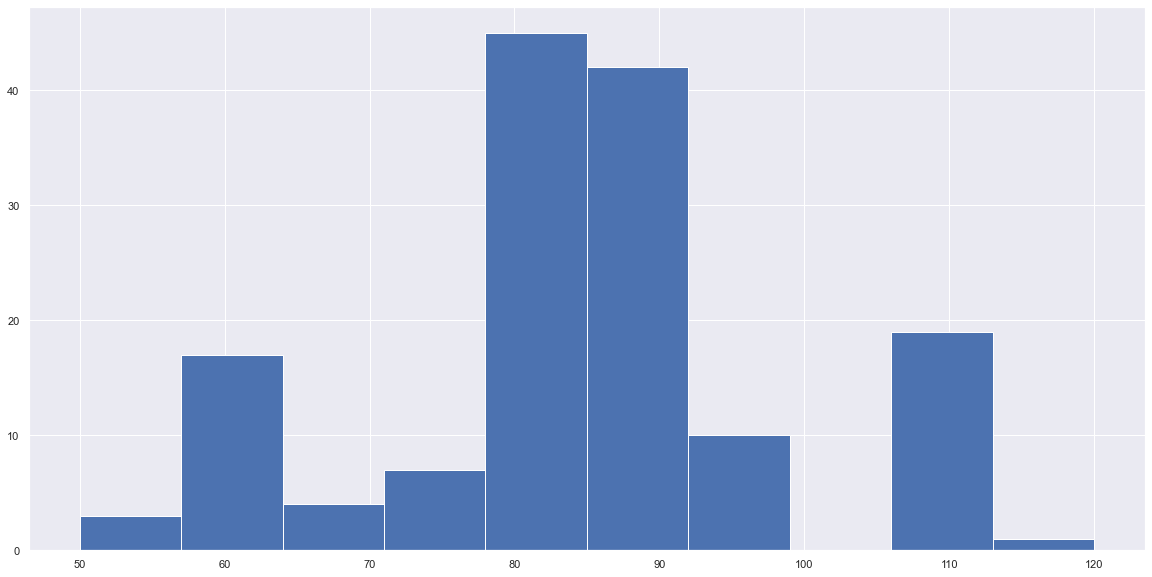

In [14]:
# Set the figure size then plot a histogram for the variables
sns.set(rc={"figure.figsize":(20,10)})
plt.hist(df["MouseWeight"], bins=10)

(array([ 4.,  0.,  0., 97., 20.,  1.,  1.,  2.,  1., 22.]),
 array([ 400.,  525.,  650.,  775.,  900., 1025., 1150., 1275., 1400.,
        1525., 1650.]),
 <BarContainer object of 10 artists>)

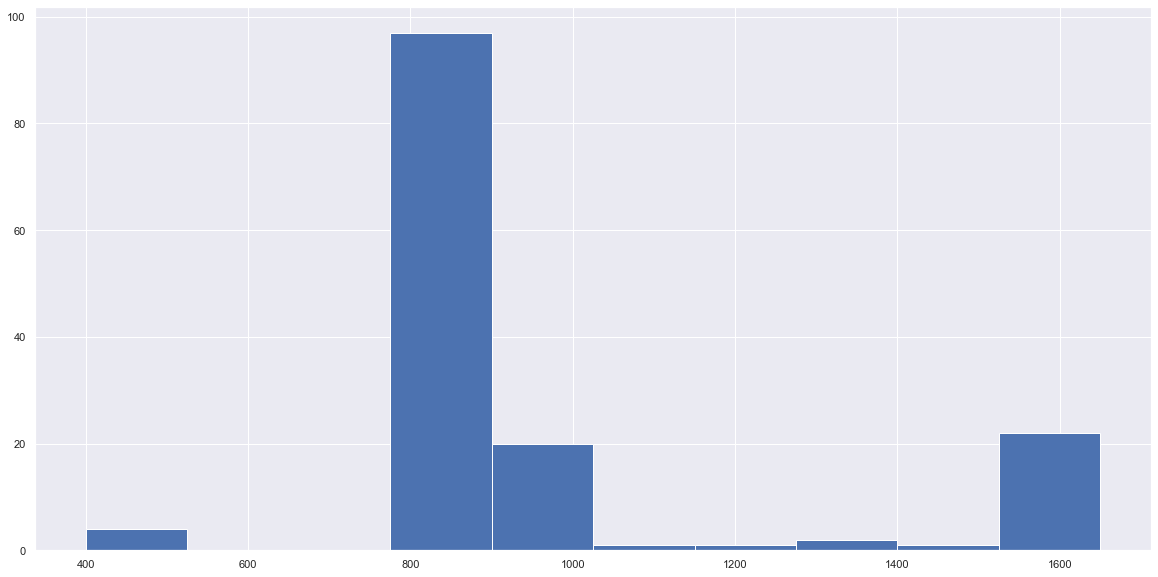

In [15]:
plt.hist(df["DPI"])

(array([19., 31., 38., 26., 15., 10.,  2.,  4.,  2.,  1.]),
 array([ 1.5 ,  2.85,  4.2 ,  5.55,  6.9 ,  8.25,  9.6 , 10.95, 12.3 ,
        13.65, 15.  ]),
 <BarContainer object of 10 artists>)

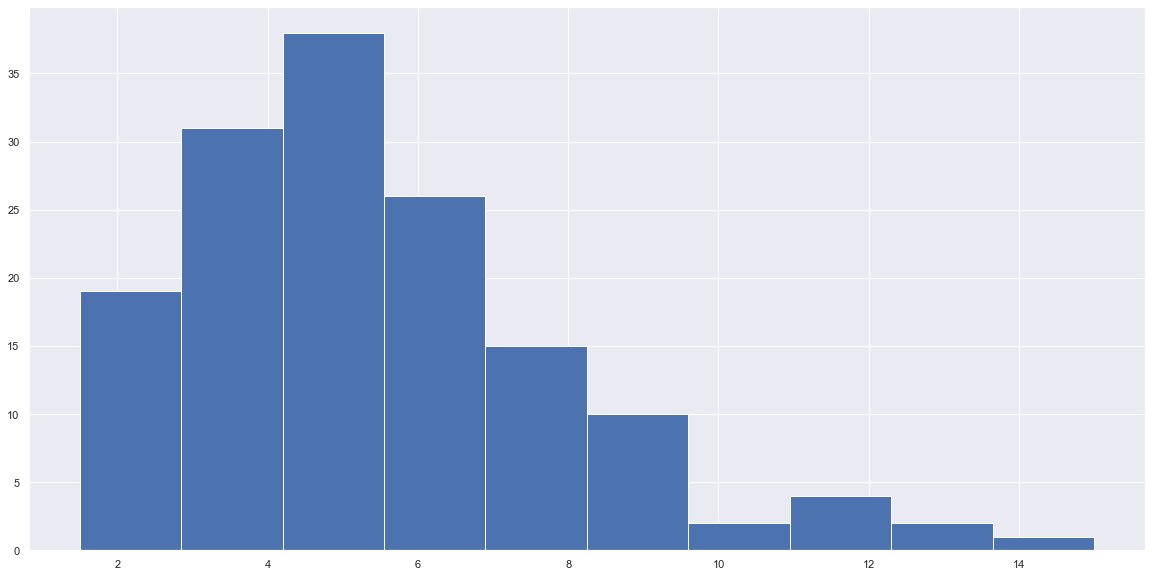

In [16]:
plt.hist(df["Sensitivity"])

(array([18., 57., 45., 15.,  5.,  5.,  1.,  1.,  0.,  1.]),
 array([ 1776. ,  3196.8,  4617.6,  6038.4,  7459.2,  8880. , 10300.8,
        11721.6, 13142.4, 14563.2, 15984. ]),
 <BarContainer object of 10 artists>)

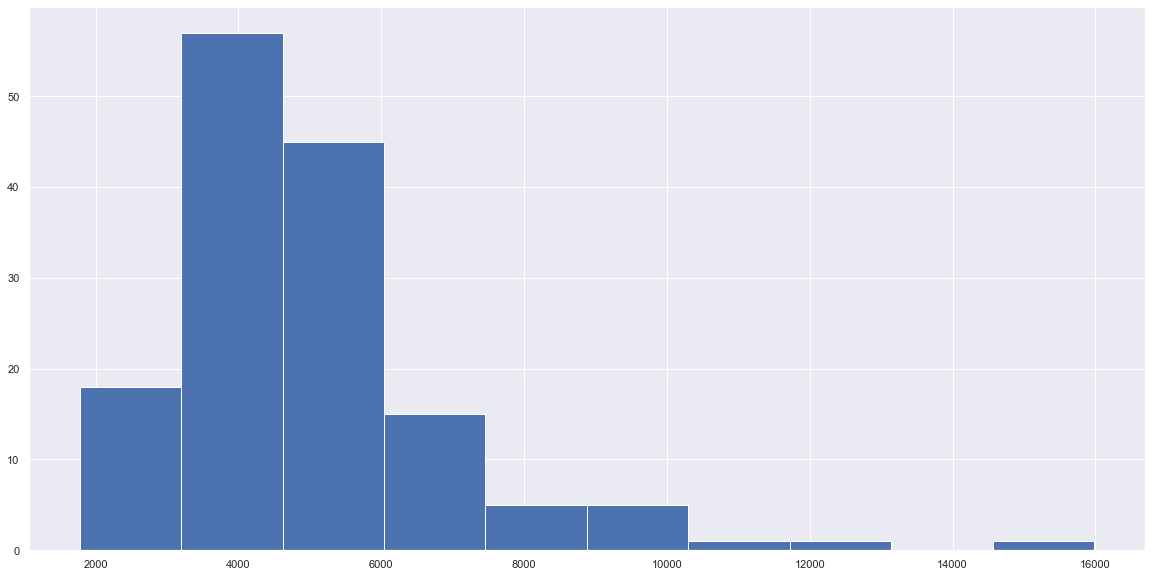

In [17]:
plt.hist(df["eDPI"])

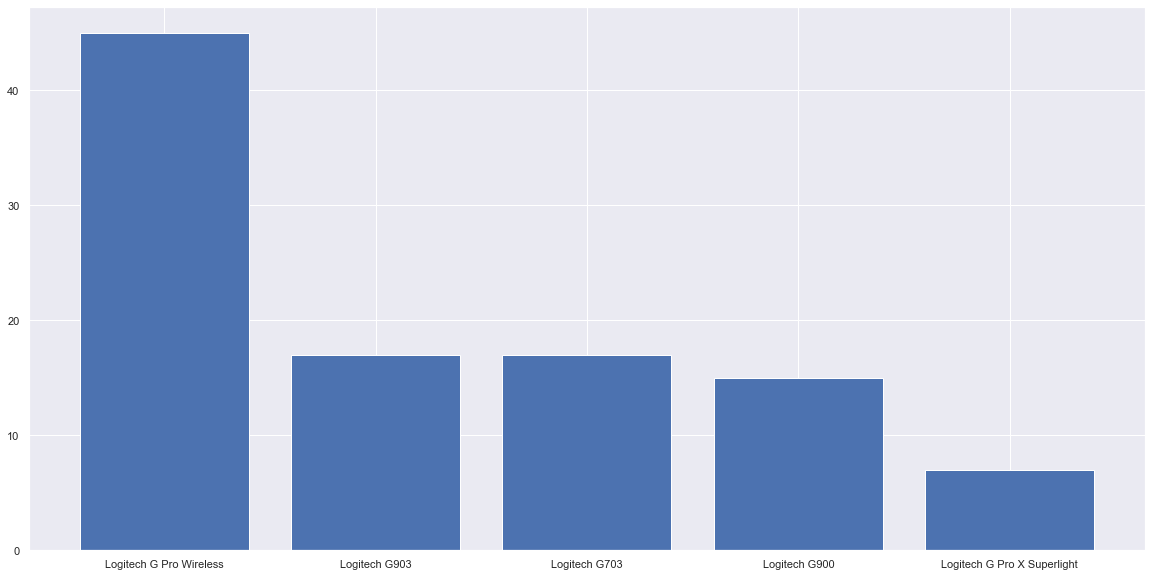

In [18]:
# Plot this car chart slightly differently since it is a categorical variable
# Plot the top 5 most popular mouse models is descending order
plt.bar(df["MouseModel"][:5],df["MouseModel"].value_counts()[:5])
plt.show()

<AxesSubplot:xlabel='Role', ylabel='eDPI'>

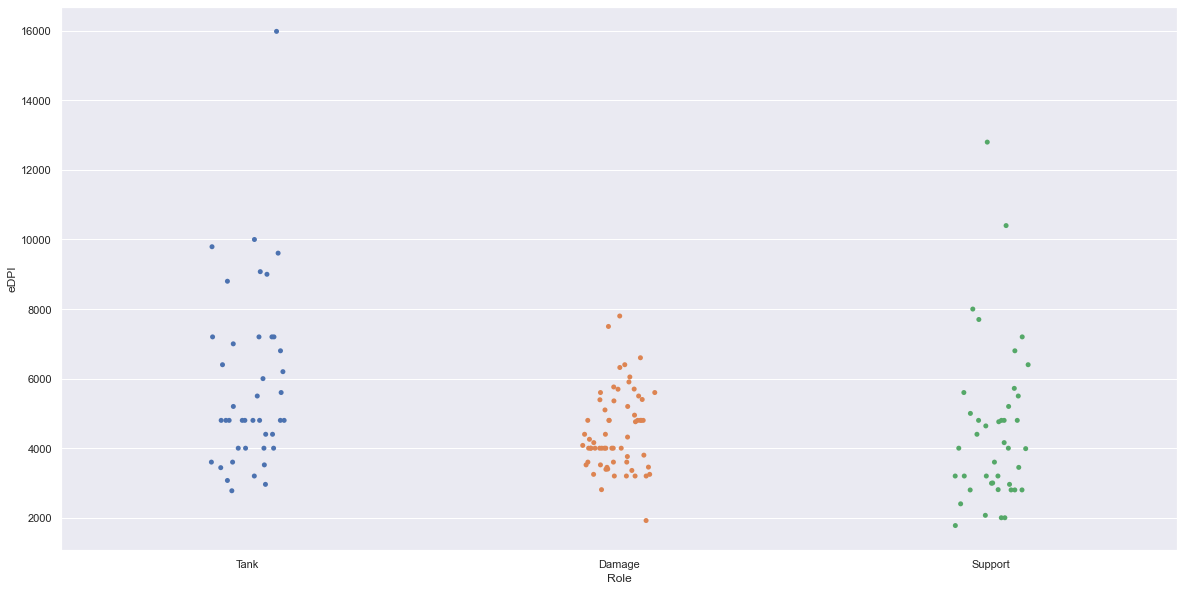

In [19]:
# Use stripplot to visually see if there is any relationship between Role and eDPI
# Most points maintain closeness with a few extreme outliers 
sns.stripplot(x="Role", y="eDPI", data=df)

<AxesSubplot:xlabel='Role', ylabel='eDPI'>

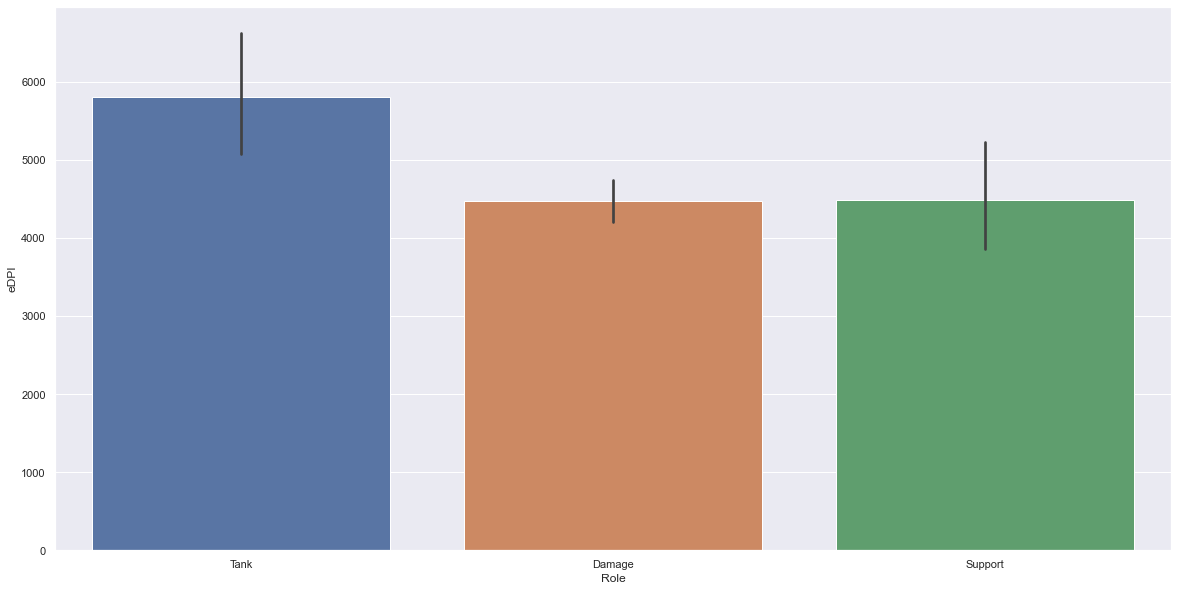

In [20]:
# Create plot to show calculated average eDPIs based on roles
role_avg = df.groupby("Role").mean()
edpi_tank = str(round(role_avg["eDPI"]["Tank"], 2))
edpi_support = str(round(role_avg["eDPI"]["Support"], 2))
edpi_damage = str(round(role_avg["eDPI"]["Damage"], 2))

sns.barplot(x="Role", y="eDPI", data=df)

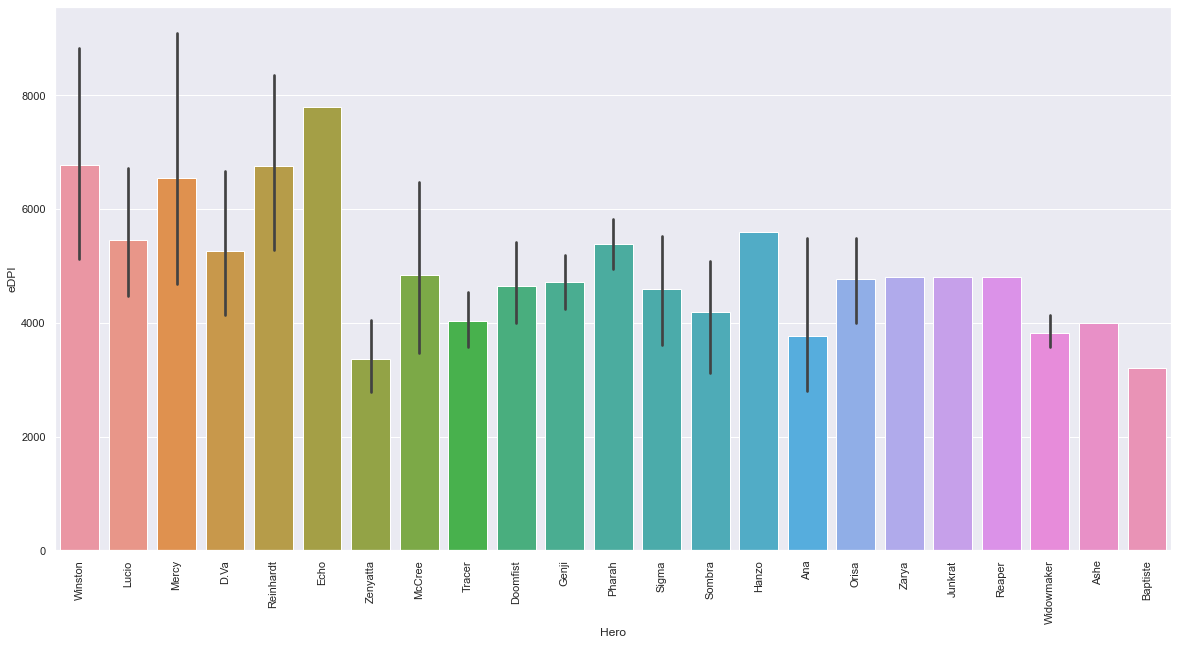

In [21]:
# Same as above, but now show calculated average eDPIs based on heroes
hero_avg = df.groupby("Hero").mean()
sns.barplot(x="Hero", y="eDPI", data=df.sort_values("cmPer360"))
plt.xticks(rotation="vertical")
plt.show()

In [22]:
# Copy dataframe as df2 to show how skewness changes, especially when plotted
df2=df.copy()
df2['DPI'] = np.log(df2['DPI'])
df2['Sensitivity'] = np.log(df2['Sensitivity'])
df2['eDPI'] = np.log(df2['eDPI'])
df2['cmPer360'] = np.log(df2['cmPer360'])
df2.skew()

MouseWeight               0.168460
MouseWeightToSizeRatio   -0.366062
DPI                       0.644238
Sensitivity              -0.191981
eDPI                      0.373934
cmPer360                 -0.374120
dtype: float64

(array([ 2., 11.,  6., 16., 25., 31., 32., 16.,  3.,  6.]),
 array([0.40546511, 0.63572362, 0.86598213, 1.09624064, 1.32649915,
        1.55675765, 1.78701616, 2.01727467, 2.24753318, 2.47779169,
        2.7080502 ]),
 <BarContainer object of 10 artists>)

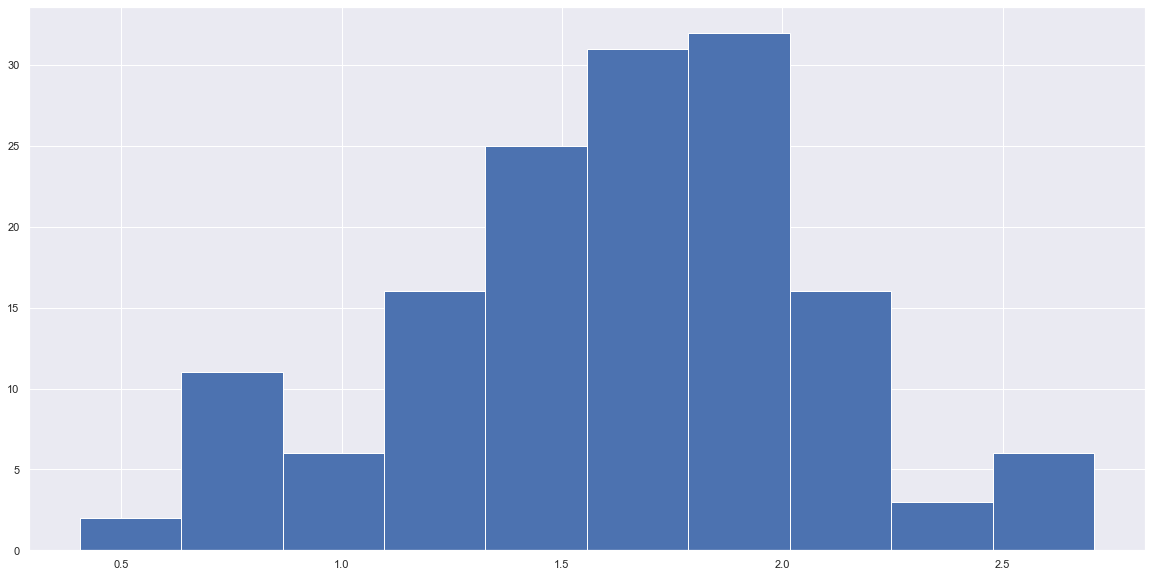

In [23]:
plt.hist(df2['Sensitivity'])

(array([ 5.,  1., 26., 37., 35., 23., 12.,  6.,  2.,  1.]),
 array([7.48211892, 7.70184138, 7.92156384, 8.1412863 , 8.36100875,
        8.58073121, 8.80045367, 9.02017613, 9.23989859, 9.45962104,
        9.6793435 ]),
 <BarContainer object of 10 artists>)

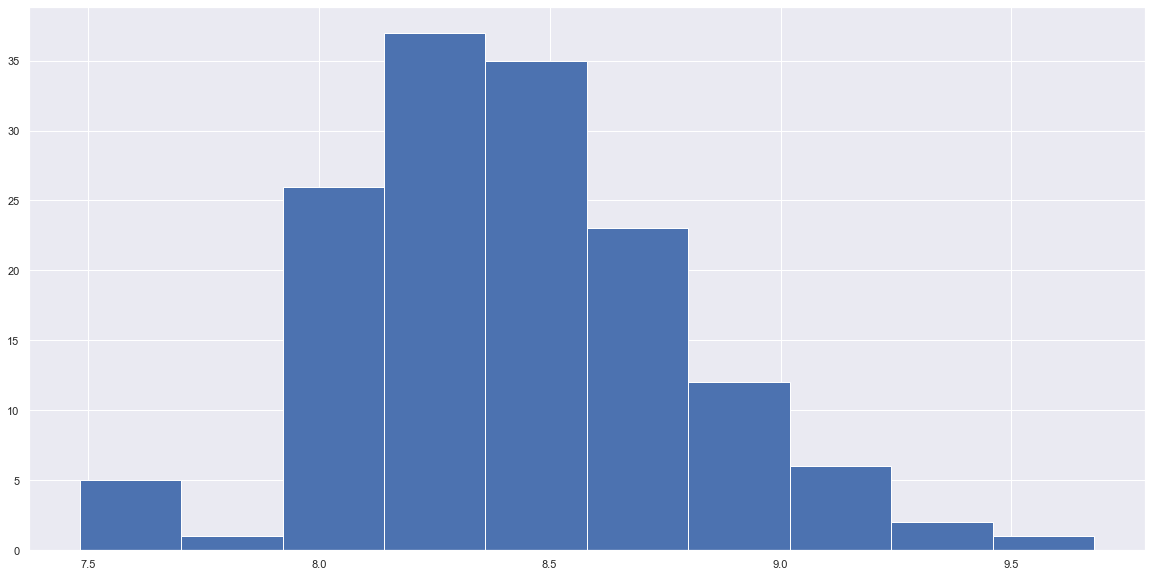

In [24]:
plt.hist(df2['eDPI'])

In [25]:
#3. look for correlations to Role and cmPer360 for all variables
corr_matrix = df.corr()
corr_matrix
corr_matrix['cmPer360'].sort_values(ascending=False)

cmPer360                  1.000000
DPI                      -0.036193
MouseWeight              -0.062774
MouseWeightToSizeRatio   -0.072503
Sensitivity              -0.721958
eDPI                     -0.840873
Name: cmPer360, dtype: float64

In [26]:
df.groupby('Role').mean()

,MouseWeight,MouseWeightToSizeRatio,DPI,Sensitivity,eDPI,cmPer360
Role,,,,,,
Damage,82.515625,1.124531,999.218750,5.003906,4473.250000,32.999063
Support,85.000000,1.149524,929.761905,5.077619,4488.571429,37.446190
Tank,84.047619,1.141667,896.428571,6.589286,5807.785714,27.661667


In [27]:
#4.  Start building a logistic regression model
#4a. first convert non numerical data into numbers using map function
yn_map = {'Support': 2, 'Damage': 1, 'Tank': 0}
df['Role'] = df['Role'].map(yn_map)
newdf = df[['MouseWeight','MouseWeightToSizeRatio','DPI','Sensitivity','eDPI','cmPer360']]
newdf.head()

,MouseWeight,MouseWeightToSizeRatio,DPI,Sensitivity,eDPI,cmPer360
0,80,1.08,800,6.00,4800,28.88
1,111,1.26,1600,9.99,15984,8.67
2,95,1.28,800,12.50,10000,13.86
3,107,1.50,800,12.01,9608,14.43
4,60,0.81,800,6.00,4800,28.88


In [28]:
#4b. now split dataset 80/20 ratio for training and test set
from sklearn.model_selection import train_test_split

x = newdf
y = df.Role
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
print(x_train.shape,y_train.shape)

(118, 6) (118,)


In [29]:
#train the model using the training data set and then predict an outcome 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.predict(x_test)

C:\Users\VTX_3\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 1, 1, 1, 0, 2, 1, 2, 0, 1, 0, 1, 2, 2, 1, 0, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [30]:
print("The intercept b0 = ", lr.intercept_)
print("The coefficient b1 = ", lr.coef_)

The intercept b0 =  [-0.00013144  0.00041136 -0.00027991]
The coefficient b1 =  [[-6.64855450e-04 -5.55510170e-07 -1.08481003e-03 -3.24315595e-03
   2.38082369e-04 -8.90547845e-03]
 [ 7.27628178e-03 -9.40064146e-05  1.25577388e-03  6.40254957e-03
  -2.16846520e-04 -1.36987775e-02]
 [-6.61142634e-03  9.45619248e-05 -1.70963844e-04 -3.15939362e-03
  -2.12358488e-05  2.26042560e-02]]


In [31]:
#5)  Evaluate the model using multiple metrics
#5a) the accuracy of the model is about 52% 
lr.score(x_test, y_test)

0.43333333333333335

In [32]:
#5b) create a confusion matrix to better understand the accuracy score metric
from sklearn.metrics import classification_report, confusion_matrix
conf_m = confusion_matrix(y_test, lr.predict(x_test))
conf_m

array([[2, 5, 1],
       [3, 8, 1],
       [2, 5, 3]], dtype=int64)

In [33]:
#5c) Evaluate 2 more metrics of precision/recall using classification report
report = classification_report(y_test, lr.predict(x_test))
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

           0       0.29      0.25      0.27         8
           1       0.44      0.67      0.53        12
           2       0.60      0.30      0.40        10

    accuracy                           0.43        30
   macro avg       0.44      0.41      0.40        30
weighted avg       0.45      0.43      0.42        30



In [34]:
#5d) get pseudo r squared using statsmodel summary
import statsmodels.api as sm
model = sm.OLS(y,x)
fitted_model = model.fit()
fitted_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.661   
Dependent Variable:     Role             AIC:                         332.4517
Date:                   2022-12-07 02:57 BIC:                         350.4349
No. Observations:       148              Log-Likelihood:              -160.23 
Df Model:               6                F-statistic:                 49.03   
Df Residuals:           142              Prob (F-statistic):          3.03e-32
R-squared (uncentered): 0.674            Scale:                       0.53191 
-------------------------------------------------------------------------------
                             Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
-------------------------------------------------------------------------------
MouseWeight                  0.0014    0.0073   0.1977  0.8435  -0.0130  0.0159
MouseWeightToSizeRatio       0.0172    0.5789   0.0298  0.9763  -1.1271  1.1616
DPI                          0.0002    0.0003   0.5899  0.5562  -0.0004  0.0008
Sensitivity                  0.0144    0.0584   0.2466  0.8056  -0.1011  0.1299
eDPI                        -0.0000    0.0001  -0.1231  0.9022  -0.0002  0.0002
cmPer360                     0.0202    0.0066   3.0672  0.0026   0.0072  0.0332
------------------------------------------------------------------------------
Omnibus:                  17.059            Durbin-Watson:               1.922
Prob(Omnibus):            0.000             Jarque-Bera (JB):            5.671
Skew:                     0.129             Prob(JB):                    0.059
Kurtosis:                 2.076             Condition No.:               51590
==============================================================================
* The condition number is large (5e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

C:\Users\VTX_3\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


<AxesSubplot:xlabel='cmPer360', ylabel='Role'>

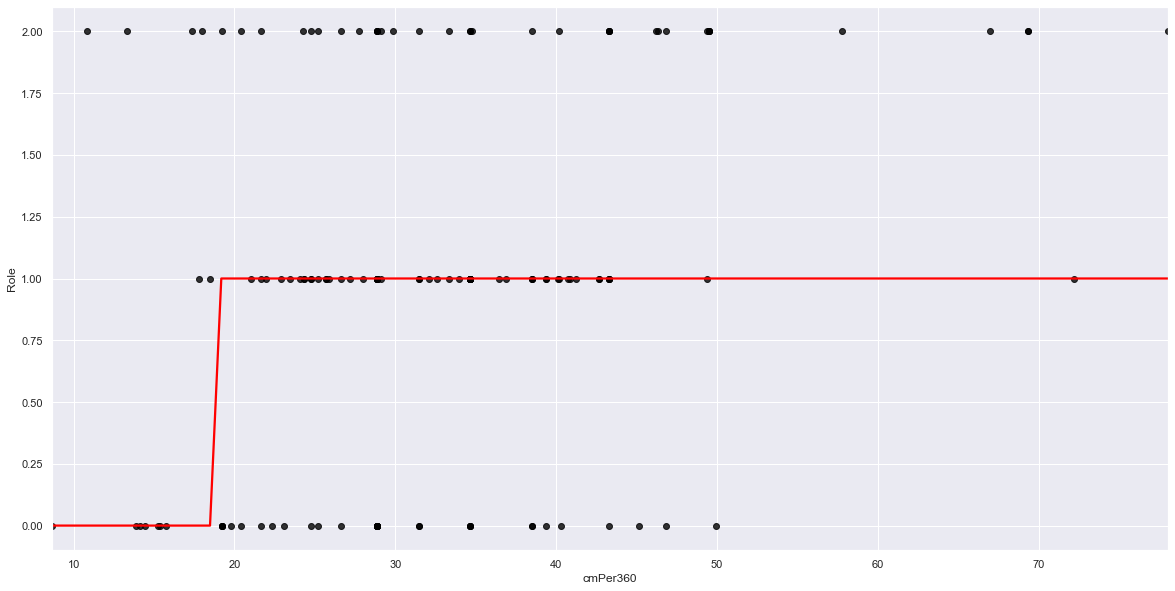

In [35]:
# final visualization of logistic regression prediction
sns.regplot(x=df.cmPer360, y=y, data=df, logistic=True, ci=None,
            scatter_kws={'color': 'black'}, line_kws={'color': 'red'})